<a href="https://colab.research.google.com/github/krakowiakpawel9/data-science-bootcamp/blob/master/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


 







### <a name='a1'></a> Import Bibliotek

In [5]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.2.1


### <a name='a2'></a> Załadowanie danych

In [6]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-03-15 to 2019-03-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### <a name='a3'></a> Eksploracja danych

In [7]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,176.6400,177.9300,173.9000,174.4200,72147390
2024-03-14,177.6900,179.5300,176.4650,178.7500,43705840
2024-03-13,175.9000,177.6200,175.5500,176.5550,30772600
2024-03-12,173.5000,176.7600,171.9800,175.3900,36610604
2024-03-11,174.3100,174.4700,171.4700,171.9600,28484777
...,...,...,...,...,...
2019-03-25,87.8895,89.1340,87.3750,88.7130,102076060
2019-03-22,90.5085,90.9490,88.1555,88.2385,127259660
2019-03-21,89.8130,91.1875,89.3640,90.9630,115355940


In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600
2024-03-12,173.50,176.76,171.980,175.390,36610604
2024-03-11,174.31,174.47,171.470,171.960,28484777


In [9]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600


In [10]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-25,87.8895,89.1340,87.3750,88.7130,102076060
2019-03-22,90.5085,90.9490,88.1555,88.2385,127259660
2019-03-21,89.8130,91.1875,89.3640,90.9630,115355940
2019-03-20,88.4970,89.9750,88.3515,89.8635,125312660
2019-03-19,87.6755,89.2080,87.6755,88.0925,127283220


In [11]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-01,90.0055,90.7835,89.9365,90.7095,84775040
2019-03-29,89.3290,89.6430,88.8315,89.0375,66415860
2019-03-28,88.5000,88.8965,87.6735,88.6710,60859160
2019-03-27,89.2065,89.3750,87.2840,88.2850,86496020
2019-03-26,89.6500,90.2885,88.6680,89.1880,97317600
2019-03-25,87.8895,89.1340,87.3750,88.7130,102076060
2019-03-22,90.5085,90.9490,88.1555,88.2385,127259660
2019-03-21,89.8130,91.1875,89.3640,90.9630,115355940
2019-03-20,88.4970,89.9750,88.3515,89.8635,125312660


In [33]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [13]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600
2024-03-12,173.50,176.76,171.980,175.390,36610604
2024-03-11,174.31,174.47,171.470,171.960,28484777


In [14]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,131.093698,132.687224,129.409521,131.070627,7.346921e+07
std,30.700811,30.961828,30.378732,30.637635,3.263763e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,98.278750,99.710000,96.960000,98.302500,5.199642e+07
50%,132.210000,133.569500,130.540000,132.129500,6.423406e+07
75%,159.700750,161.440250,157.750000,159.515250,8.571150e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.310937e+02,3.070081e+01,8.207550e+01,9.827875e+01,1.322100e+02,1.597007e+02,1.872000e+02
high,1258.0,1.326872e+02,3.096183e+01,8.348000e+01,9.971000e+01,1.335695e+02,1.614402e+02,1.886540e+02
low,1258.0,1.294095e+02,3.037873e+01,8.130160e+01,9.696000e+01,1.305400e+02,1.577500e+02,1.848400e+02
close,1258.0,1.310706e+02,3.063763e+01,8.182000e+01,9.830250e+01,1.321295e+02,1.595153e+02,1.865700e+02
volume,1258.0,7.346921e+07,3.263763e+07,1.762674e+07,5.199642e+07,6.423406e+07,8.571150e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [16]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.930,173.900,174.420,72147390
2024-03-14,177.69,179.530,176.465,178.750,43705840
2024-03-13,175.90,177.620,175.550,176.555,30772600
2024-03-12,173.50,176.760,171.980,175.390,36610604
2024-03-11,174.31,174.470,171.470,171.960,28484777
2024-03-08,176.44,178.785,174.330,175.350,37893242
2024-03-07,174.83,177.990,173.720,176.820,34063283
2024-03-06,175.54,176.460,173.260,173.510,32090926
2024-03-05,176.93,176.930,173.303,174.120,37228343


In [17]:
df['open']

Date
2024-03-15    176.64
2024-03-14    177.69
2024-03-13    175.90
2024-03-12    173.50
2024-03-11    174.31
2024-03-08    176.44
2024-03-07    174.83
2024-03-06    175.54
2024-03-05    176.93
2024-03-04    177.53
Name: open, dtype: float64

In [18]:
df.open

Date
2024-03-15    176.64
2024-03-14    177.69
2024-03-13    175.90
2024-03-12    173.50
2024-03-11    174.31
2024-03-08    176.44
2024-03-07    174.83
2024-03-06    175.54
2024-03-05    176.93
2024-03-04    177.53
Name: open, dtype: float64

In [19]:
df[['open']]

,open
Date,
2024-03-15,176.64
2024-03-14,177.69
2024-03-13,175.90
2024-03-12,173.50
2024-03-11,174.31
2024-03-08,176.44
2024-03-07,174.83
2024-03-06,175.54
2024-03-05,176.93


In [20]:
df[['open', 'close']]

,open,close
Date,,
2024-03-15,176.64,174.420
2024-03-14,177.69,178.750
2024-03-13,175.90,176.555
2024-03-12,173.50,175.390
2024-03-11,174.31,171.960
2024-03-08,176.44,175.350
2024-03-07,174.83,176.820
2024-03-06,175.54,173.510
2024-03-05,176.93,174.120


In [21]:
df.iloc[:, 0]

Date
2024-03-15    176.64
2024-03-14    177.69
2024-03-13    175.90
2024-03-12    173.50
2024-03-11    174.31
2024-03-08    176.44
2024-03-07    174.83
2024-03-06    175.54
2024-03-05    176.93
2024-03-04    177.53
Name: open, dtype: float64

In [22]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2024-03-15,176.64,174.420
2024-03-14,177.69,178.750
2024-03-13,175.90,176.555
2024-03-12,173.50,175.390
2024-03-11,174.31,171.960
2024-03-08,176.44,175.350
2024-03-07,174.83,176.820
2024-03-06,175.54,173.510
2024-03-05,176.93,174.120


In [23]:
df.iloc[:, 3:5]

,close,volume
Date,,
2024-03-15,174.420,72147390
2024-03-14,178.750,43705840
2024-03-13,176.555,30772600
2024-03-12,175.390,36610604
2024-03-11,171.960,28484777
2024-03-08,175.350,37893242
2024-03-07,176.820,34063283
2024-03-06,173.510,32090926
2024-03-05,174.120,37228343


In [24]:
df.iloc[:, -1]

Date
2024-03-15    72147390
2024-03-14    43705840
2024-03-13    30772600
2024-03-12    36610604
2024-03-11    28484777
2024-03-08    37893242
2024-03-07    34063283
2024-03-06    32090926
2024-03-05    37228343
2024-03-04    37381520
Name: volume, dtype: int64

In [25]:
df.iloc[:, [-1]]

,volume
Date,
2024-03-15,72147390
2024-03-14,43705840
2024-03-13,30772600
2024-03-12,36610604
2024-03-11,28484777
2024-03-08,37893242
2024-03-07,34063283
2024-03-06,32090926
2024-03-05,37228343


In [26]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-03-15,173.900,174.420,72147390
2024-03-14,176.465,178.750,43705840
2024-03-13,175.550,176.555,30772600
2024-03-12,171.980,175.390,36610604
2024-03-11,171.470,171.960,28484777
2024-03-08,174.330,175.350,37893242
2024-03-07,173.720,176.820,34063283
2024-03-06,173.260,173.510,32090926
2024-03-05,173.303,174.120,37228343


### <a name='a5'></a>  Selekcja wierszy

In [27]:
df

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.930,173.900,174.420,72147390
2024-03-14,177.69,179.530,176.465,178.750,43705840
2024-03-13,175.90,177.620,175.550,176.555,30772600
2024-03-12,173.50,176.760,171.980,175.390,36610604
2024-03-11,174.31,174.470,171.470,171.960,28484777
2024-03-08,176.44,178.785,174.330,175.350,37893242
2024-03-07,174.83,177.990,173.720,176.820,34063283
2024-03-06,175.54,176.460,173.260,173.510,32090926
2024-03-05,176.93,176.930,173.303,174.120,37228343


In [28]:
df.iloc[0]

open           176.64
high           177.93
low            173.90
close          174.42
volume    72147390.00
Name: 2024-03-15 00:00:00, dtype: float64

In [29]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600


In [30]:
df

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.930,173.900,174.420,72147390
2024-03-14,177.69,179.530,176.465,178.750,43705840
2024-03-13,175.90,177.620,175.550,176.555,30772600
2024-03-12,173.50,176.760,171.980,175.390,36610604
2024-03-11,174.31,174.470,171.470,171.960,28484777
2024-03-08,176.44,178.785,174.330,175.350,37893242
2024-03-07,174.83,177.990,173.720,176.820,34063283
2024-03-06,175.54,176.460,173.260,173.510,32090926
2024-03-05,176.93,176.930,173.303,174.120,37228343


In [31]:
df.loc['2019-12-10': '2019-12-02']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

### <a name='a6'></a> Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2019-12-10 to 2019-05-10
Data columns (total 5 columns):
Open      149 non-null float64
High      149 non-null float64
Low       149 non-null float64
Close     149 non-null float64
Volume    149 non-null int64
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,27.73,27.993,27.6050,27.89,23604938
2019-12-09,27.96,28.360,27.6800,27.68,21098387
2019-12-06,28.40,28.925,27.8001,27.86,33144371
2019-12-05,28.94,28.990,28.1800,28.65,22567274
2019-12-04,29.10,29.200,28.7000,29.06,22526474


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,36.181936,36.785872,35.414060,36.077718,1.768119e+07
std,6.214437,6.281313,6.107313,6.164417,2.163312e+07
min,26.060000,26.800000,25.580000,25.990000,3.380003e+06
25%,31.200000,31.720000,30.170000,31.080000,7.598828e+06
50%,34.250000,34.800000,33.400000,34.000000,9.746505e+06
75%,42.870000,43.720000,41.840000,42.610000,2.109839e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,27.73,27.993,27.6050,27.89,23604938
2019-12-09,27.96,28.360,27.6800,27.68,21098387
2019-12-06,28.40,28.925,27.8001,27.86,33144371


In [ ]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-12-10,27.73,27.993,27.6050,27.89,23604938,27.810
2019-12-09,27.96,28.360,27.6800,27.68,21098387,27.820
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df['Daily Change']

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_Change.min()

-0.10752946836661048

In [ ]:
df.Daily_Change.max()

0.08236775818639797

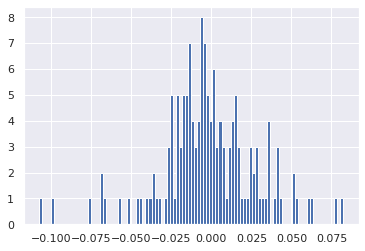

In [ ]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

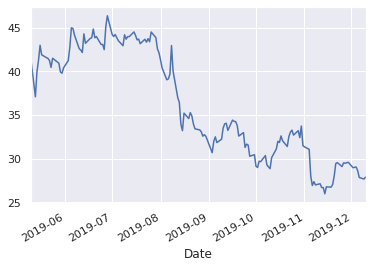

In [ ]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080,29.02,0.001378
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130,28.65,-0.027574


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.310,39.960,36.850,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.880,38.950,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.060,41.250,43.00,38115524,42.2400,41.29,0.041414
2019-05-24,41.280,41.510,40.500,41.51,8786751,41.3950,40.47,0.025698
2019-05-31,41.150,41.570,39.410,40.41,23209848,40.7800,39.80,0.015327
...,...,...,...,...,...,...,...,...
2019-11-26,29.490,30.150,29.360,29.53,29590489,29.5100,29.11,0.014428
2019-11-29,29.410,29.850,29.250,29.60,8115145,29.5050,29.49,0.003730
2019-12-03,28.195,29.330,28.150,29.02,25389163,28.6075,28.98,0.001380


In [ ]:
df_positive.Daily_Change.mean()

0.02280451612165266

In [ ]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.290,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.680,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.240,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.280,40.5000,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2019-11-27,29.42,29.590,28.8800,29.49,22421386,29.455,29.53,-0.001355
2019-12-02,29.32,29.525,28.7000,28.98,17423896,29.150,29.60,-0.020946
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109


In [ ]:
 df_negative.Daily_Change.mean()

-0.021329700483015638

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2019-12-04    False
2019-12-05    False
2019-12-06    False
2019-12-09    False
2019-12-10    False
Length: 149, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.42,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.82,27.86,-0.006461


In [ ]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.450,31.750,30.1200,31.08,32330121,31.2650,31.37,-0.009245
2019-11-05,29.130,29.300,27.9700,28.02,52180615,28.5750,31.08,-0.098456
2019-11-06,26.060,27.550,25.5800,26.94,133569790,26.5000,28.02,-0.038544
2019-11-07,26.800,27.420,26.4500,27.38,65949472,27.0900,26.94,0.016333
2019-11-08,27.480,27.620,26.9150,27.01,45263118,27.2450,27.38,-0.013514
2019-11-11,27.030,27.210,26.2300,27.14,41445732,27.0850,27.01,0.004813
2019-11-12,27.380,27.660,26.6600,26.70,37095389,27.0400,27.14,-0.016212
2019-11-13,26.470,26.820,26.1400,26.71,34512663,26.5900,26.70,0.000375
2019-11-14,26.800,26.860,25.6650,25.99,28027875,26.3950,26.71,-0.026956


In [ ]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080,29.02,0.001378
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130,28.65,-0.027574


In [ ]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
